In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Baby Names Visual

From ["Measuring Statistical Dispersion with the Gini Coefficient"](http://kimberlyfessel.com/mathematics/applications/gini-use-cases/)

_Kimberly Fessel, PhD_ &nbsp; ||  &nbsp; _05 June 2020_  &nbsp;

Begin by loading the baby names from the US [Social Security Administration](https://www.ssa.gov/oact/babynames/limits.html) and filtering to 1950 through 2018.

**Download data from the hyperlink `State-specific data`**

In [2]:
names_dir = 'namesbystate/'
names_data_list = []
names_columns = ['state', 'gender', 'year', 'name', 'babies']

for file in os.listdir(names_dir):
    if file.endswith(".TXT"):
        names_data = pd.read_csv(names_dir + file, header=None, names=names_columns)
        names_data_list.append(names_data)
    else:
        continue

names_data = pd.concat(names_data_list)

In [3]:
data = names_data[names_data.year >= 1950]

In [4]:
data.head()

,state,gender,year,name,babies
1269,AK,F,1950,Mary,71
1270,AK,F,1950,Linda,68
1271,AK,F,1950,Barbara,46
1272,AK,F,1950,Patricia,38
1273,AK,F,1950,Susan,33


Higher proportion of male babies registered with Social Security Administration

In [5]:
data.groupby('gender').babies.sum() / data.babies.sum()

gender
F    0.47002
M    0.52998
Name: babies, dtype: float64

In [6]:
total_babies = data.babies.sum()
female_perc = data[data.gender=='F'].babies.sum() / total_babies
male_perc = data[data.gender=='M'].babies.sum() / total_babies

### Most Popular Names

Check most popular names by gender -- 18 out of top 20 names more commonly given to males.

In [7]:
most_popular_names = (
    data
    .groupby(['name', 'gender'])
    .babies
    .sum()
    .reset_index()
    .sort_values('babies', ascending=False)
)

In [8]:
most_popular_names[:20]   

,name,gender,babies
21265,Michael,M,3909447
7361,David,M,2891718
13079,James,M,2889645
14536,John,M,2747173
25057,Robert,M,2579123
30681,William,M,2128870
6066,Christopher,M,2017608
14780,Joseph,M,1706738
7056,Daniel,M,1695002
20705,Matthew,M,1584759


### Unique Names by Gender

Calculate and plot number of unique names per gender over time.

In [9]:
unique_names_per_gender = (
    data
    .groupby(['year', 'gender'])
    .name
    .nunique()
    .unstack()
)

In [10]:
unique_names_per_gender.head()

gender,F,M
year,,
1950,2112,1721
1951,2173,1735
1952,2210,1763
1953,2269,1757
1954,2301,1755


## Overlays

### "Before" Visual

<AxesSubplot:xlabel='year'>

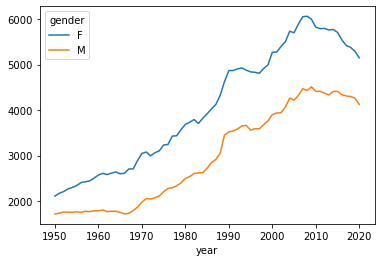

In [11]:
unique_names_per_gender.plot()

#plt.savefig('baby_names_before.png', dpi=200);

## Post modification

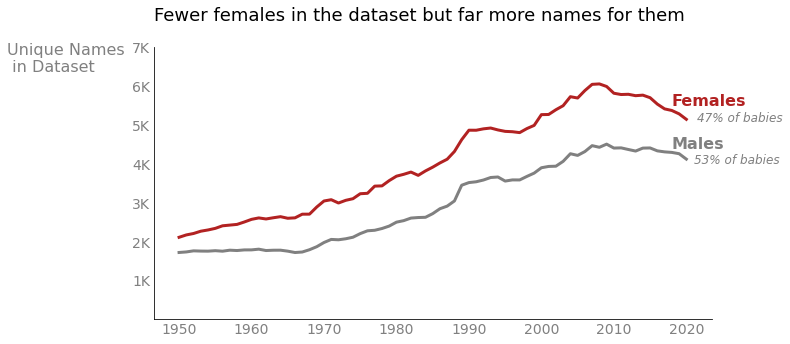

In [34]:
# uncomment feature by feature to figure out what each part is doing. 

unique_names_per_gender.plot(figsize=(10, 5), linewidth=3,
                             color=['firebrick', 'gray']
                            )

# Axes labels
plt.xlabel('')
plt.ylabel("Unique Names\n in Dataset",
           rotation=0,
           position=(-0.1, 0.9),
           fontsize=16,
           ha='left',
           labelpad=125,
           color='gray'
         )

# # Remove box
sns.despine()

# # Set y-limits and remove legend
plt.ylim(0, None)
plt.legend([], frameon=False)

# # Title
plt.title("Fewer females in the dataset but far more names for them\n",
          fontsize=18, loc='left'
         )

# # Annotations
plt.text(2018, 5500, "Females", color='firebrick', fontsize=16, fontweight='bold')
plt.text(2018, 4400, "Males", color='gray', fontsize=16, fontweight='bold')
plt.text(2021.5, 5100, f'{female_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')
plt.text(2021, 4000, f'{male_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')

# # # Tick labels
ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=14, length=0)

g = ax.get_yticks()
plt.yticks(g[1:])

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x,p: str(int(x/1000))+'K')
)

# Save figure
#plt.savefig('baby_names_final.png', dpi=200, bbox_inches='tight');